# Importing libraries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# LOADING DATASET

In [44]:
pumpkins = pd.read_csv(r'C:\Users\Engr. CY\Downloads\US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [45]:
#checking city name column

pumpkins["City Name"]

0       BALTIMORE
1       BALTIMORE
2       BALTIMORE
3       BALTIMORE
4       BALTIMORE
          ...    
1752    ST. LOUIS
1753    ST. LOUIS
1754    ST. LOUIS
1755    ST. LOUIS
1756    ST. LOUIS
Name: City Name, Length: 1757, dtype: object

In [46]:
pumpkins["Variety"].unique()

array([nan, 'HOWDEN TYPE', 'HOWDEN WHITE TYPE', 'CINDERELLA', 'FAIRYTALE',
       'PIE TYPE', 'BIG MACK TYPE', 'MIXED HEIRLOOM VARIETIES',
       'MINIATURE', 'BLUE TYPE', 'KNUCKLE HEAD'], dtype=object)

In [47]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()

C:\Users\Engr. CY\AppData\Local\Temp\ipykernel_2984\3582767433.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


In [48]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14878293554077526
-0.1667332249274541


# Data visualization using matplotlib and seaborn

<Axes: xlabel='Variety'>

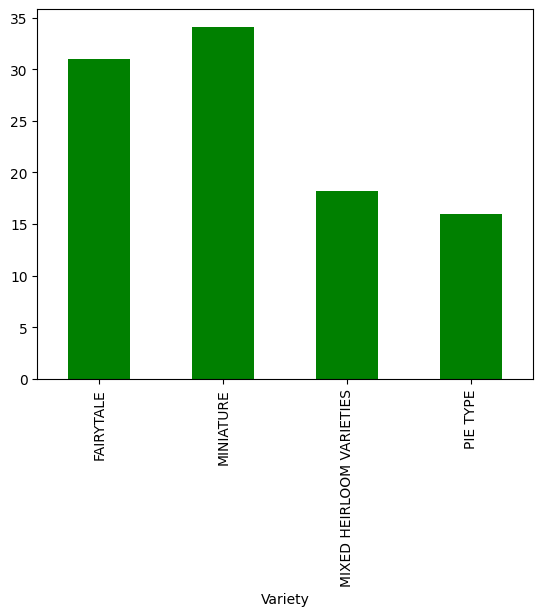

In [73]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar', color='g')

Text(0, 0.5, 'Pumpkin Price')

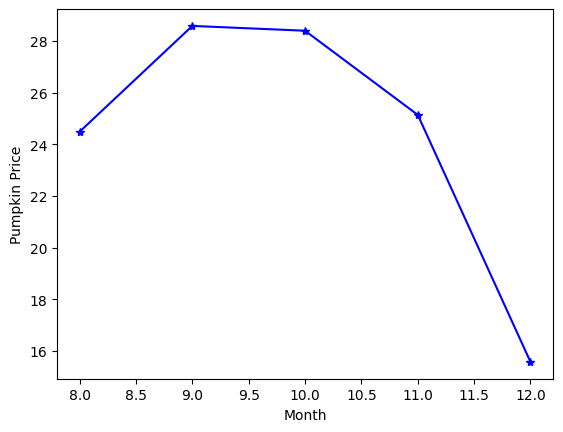

In [72]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='line', marker='*', color='b')
plt.ylabel("Pumpkin Price")

In [50]:
# Assuming you want to predict the 'Price' based on 'DayOfYear'
X = new_pumpkins['DayOfYear'].values.reshape(-1, 1)
y = new_pumpkins['Price'].values

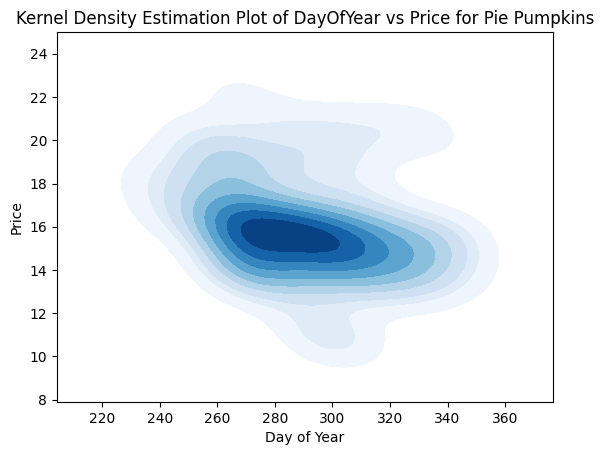

In [51]:
import seaborn as sns

pie_pumpkins = new_pumpkins[new_pumpkins['Variety'] == 'PIE TYPE']
sns.kdeplot(data=pie_pumpkins, x='DayOfYear', y='Price', cmap='Blues', fill=True)
plt.xlabel('Day of Year')
plt.ylabel('Price')
plt.title('Kernel Density Estimation Plot of DayOfYear vs Price for Pie Pumpkins')
plt.show()


<Axes: xlabel='DayOfYear', ylabel='Price'>

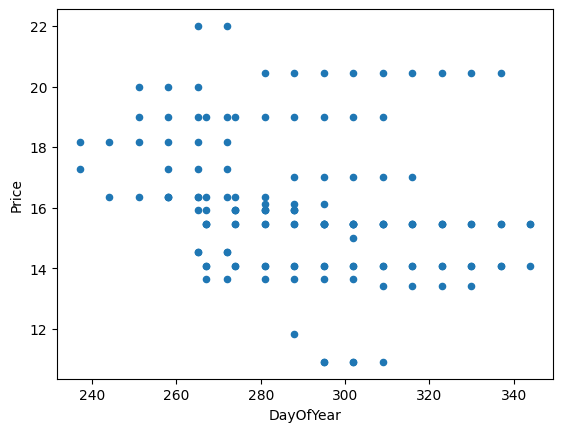

In [52]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
pie_pumpkins.plot.scatter('DayOfYear','Price') 

In [53]:
pie_pumpkins.dropna(inplace=True)
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 70 to 1630
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    int32  
 1   DayOfYear   144 non-null    int64  
 2   Variety     144 non-null    object 
 3   City        144 non-null    object 
 4   Package     144 non-null    object 
 5   Low Price   144 non-null    float64
 6   High Price  144 non-null    float64
 7   Price       144 non-null    float64
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 9.6+ KB


C:\Users\Engr. CY\AppData\Local\Temp\ipykernel_2984\3144308612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)


In [54]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [55]:

# Training the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

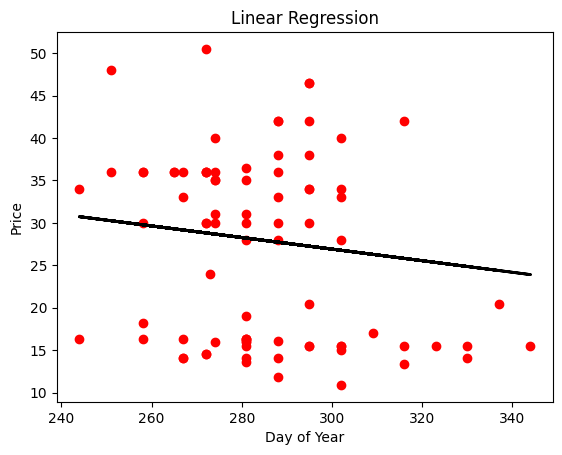

In [64]:
# Plotting the linear regression line
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='black', linewidth=2)
plt.xlabel('Day of Year')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.show()

In [65]:


# Making predictions
y_pred = lin_reg.predict(X_test)

In [66]:
y_pred

array([27.25407727, 24.38736726, 28.20964727, 26.29850727, 28.20964727,
       28.20964727, 23.90958226, 27.73186227, 28.82394227, 28.82394227,
       27.25407727, 28.68743227, 28.82394227, 27.25407727, 26.77629227,
       29.16521727, 27.73186227, 27.25407727, 27.25407727, 28.68743227,
       27.73186227, 27.25407727, 28.20964727, 25.82072227, 24.86515226,
       29.77951227, 27.25407727, 29.77951227, 26.77629227, 30.25729727,
       25.82072227, 27.73186227, 29.16521727, 26.77629227, 27.73186227,
       28.68743227, 27.25407727, 25.82072227, 24.86515226, 30.73508227,
       27.25407727, 28.20964727, 26.77629227, 28.82394227, 27.73186227,
       30.73508227, 29.30172727, 26.77629227, 28.20964727, 29.77951227,
       28.75568727, 28.20964727, 29.16521727, 29.77951227, 25.34293727,
       28.20964727, 27.73186227, 27.25407727, 28.68743227, 27.73186227,
       28.20964727, 29.16521727, 28.82394227, 28.20964727, 26.77629227,
       28.68743227, 28.82394227, 28.20964727, 28.68743227, 29.77

In [67]:



# Evaluating the model
print('Coefficients:', lin_reg.coef_)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2):', r2_score(y_test, y_pred))


Coefficients: [-0.068255]
Mean Squared Error: 112.24614221609957
Coefficient of determination (R^2): 0.03399916010101278


In [68]:
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.02194048288903694


In [69]:
pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 10.6 (37.9%)
